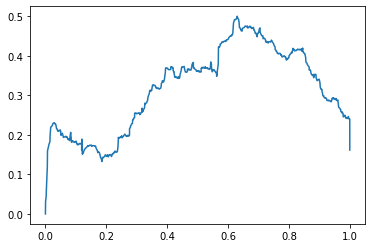

0.3154597116344475
0.3185707425400392
monteCarlo result = 0.4394899699856507
Trapeze result = 0.44003063034720274
0.45849962291494123
6.8240992301183026
6.82459868584804
6.830097960551433


In [41]:
%run conditionalBrownianBridge.ipynb import *

In [42]:
import numpy as np
def g(x):
    return 3*x**3+x**2-8*x+4
def f(x):
    return 4*x**2-3*x+7

In [43]:
def trapezoidal(array):
    '''
    Calculates the numerical integral of an array using the trapezoidal rule.
    
    Args:
        array (list): A list of values representing the function to be integrated.
    
    Returns:
        float: The numerical integral of the array using the trapezoidal rule.
    '''
    n = len(array)
    a = 0
    b = 1
    h = (b-a)/n
    sumval = 0
    for i in range(1,n):
        sumval = sumval+2*array[i]
    sumval = h*(sumval+array[0]+array[-1])/2
    return sumval

In [44]:
def trapezoidal_inequivalent(x, y):
    n = len(x) - 1  # Number of subintervals
    integral = 0.0  # Initialize the integral

    # Iterate over the subintervals
    for i in range(n):
        h = x[i+1] - x[i]  # Width of the current subinterval
        area = (y[i] + y[i+1]) * (h / 2.0)  # Area of the trapezoid
        integral += area  # Add the area to the integral

    return integral

In [45]:
def montecarlo(x, y, a, b):
    
    n = len(x)  # Number of samples
    integral_sum = 0.0

    for i in range(n):
        if x[i] >= a and x[i] <= b:  # Only consider samples within the integration bounds
            integral_sum += y[i]

    average = integral_sum / n
    integral = (b - a) * average
    return integral

In [87]:
#np.random.seed(7424)
x = np.zeros(1000)
dct = {}
for i in range(1000):
        x[i] = np.random.uniform(0,1)
        dct[x[i]] = g(x[i])*f(x[i])
        
dct = sort_dict(dct)
result = list(dct.values())
x = list(dct.keys())

Mc = montecarlo(x,result,0,1)
Tr = trapezoidal(result)
Tr2 = trapezoidal_inequivalent(x,result)
print(Mc)
print(Tr)
print(Tr2)

6.764404110676021
6.750491213798901
7.093967065745359


In [84]:
def calculate_relative_error(approximation, exact_value):
    return abs(approximation - exact_value) / abs(exact_value)

In [88]:
exact_value = 6.9933
print(calculate_relative_error(Mc,exact_value))
print(calculate_relative_error(Tr,exact_value))
print(calculate_relative_error(Tr2,exact_value))

0.03273074075529128
0.034720201650308015
0.014394787260000144
